### 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout
from keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
data=pd.read_csv(r'./data/USD_KRW.csv')
data.columns=['date', 'rate']
data.head()

,date,rate
0,2010-01-04,1161.0
1,2010-01-05,1147.3
2,2010-01-06,1141.4
3,2010-01-07,1132.0
4,2010-01-08,1134.1


#### 환율의 시각화

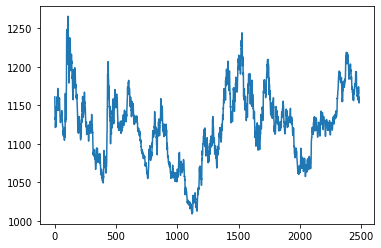

In [3]:
plt.plot(data['rate'])

#### data reshape

In [4]:
data_1=data[['rate']]

data_1_rate=data_1['rate'].as_matrix().reshape(-1, 1)

sc_rate = MinMaxScaler()

data_1['rate'] = sc_rate.fit_transform(data_1_rate)

data_1=pd.DataFrame(data_1)
data_1.columns=['rate']

C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [5]:
data_1=pd.DataFrame(data_1)
data_1.head()

,rate
0,0.591972
1,0.538581
2,0.515588
3,0.478956
4,0.487140


####  하루 데이터 활용하여 다음날 예측

In [6]:
data_y = data_1[["rate"]]
data_y = data_y[1:].reset_index()[["rate"]]
data_y = data_y.rename(columns = {"rate" : "y"})
data_y

,y
0,0.538581
1,0.515588
2,0.478956
3,0.487140
4,0.437256
...,...
2479,0.588075
2480,0.592362
2481,0.571317
2482,0.561185


In [7]:
result = pd.concat([data_1,data_y], axis=1)[:-1]
result.head()

,rate,y
0,0.591972,0.538581
1,0.538581,0.515588
2,0.515588,0.478956
3,0.478956,0.487140
4,0.487140,0.437256


#### label 생성

In [8]:
y=result['y']

In [9]:
d_matrix=data_1.as_matrix()

p_result =[]
for i in range(len(data_1)-1):
    for j in range(1):
        p_result.append(d_matrix[i+j])

C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [10]:
p_result=np.array(p_result)
p_result=p_result.reshape((len(d_matrix)-1,1,1))
p_result

array([[[0.59197194]],

       [[0.53858145]],

       [[0.51558846]],

       ...,

       [[0.59236165]],

       [[0.57131723]],

       [[0.56118472]]])

In [11]:
p_result.shape, y.shape

((2484, 1, 1), (2484,))

In [12]:
X_train,X_test = p_result[:int(len(p_result)*0.8)],p_result[int(len(p_result)*0.8):]
y_train,y_test = y[:int(len(p_result)*0.8)],y[int(len(p_result)*0.8):]

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1987, 1, 1), (1987,), (497, 1, 1), (497,))

#### 모델 생성

In [14]:
model = Sequential()

model.add(LSTM(units=100, input_shape=(1,1)))
model.add(Dense(units=1))
model.add(Dropout(0.1))

early_stopping = EarlyStopping(patience=30)

In [15]:
model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=400, batch_size=20, callbacks=[early_stopping])

Epoch 1/400
1987/1987 [==============================] - 1s 516us/step - loss: 0.0664
Epoch 2/400
 920/1987 [============>.................] - ETA: 0s - loss: 0.0282

C:\Users\wsm26\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1987/1987 [==============================] - 0s 192us/step - loss: 0.0261
Epoch 3/400
1987/1987 [==============================] - 0s 214us/step - loss: 0.0245
Epoch 4/400
1987/1987 [==============================] - 0s 185us/step - loss: 0.0244
Epoch 5/400
1987/1987 [==============================] - 0s 184us/step - loss: 0.0240
Epoch 6/400
1987/1987 [==============================] - 0s 184us/step - loss: 0.0231
Epoch 7/400
1987/1987 [==============================] - 0s 182us/step - loss: 0.0209
Epoch 8/400
1987/1987 [==============================] - 0s 196us/step - loss: 0.0235
Epoch 9/400
1987/1987 [==============================] - 0s 186us/step - loss: 0.0216
Epoch 10/400
1987/1987 [==============================] - 0s 185us/step - loss: 0.0210
Epoch 11/400
1987/1987 [==============================] - 0s 196us/step - loss: 0.0222
Epoch 12/400
1987/1987 [==============================] - 0s 187us/step - loss: 0.0229
Epoch 13/400
1987/1987 [==============================] - 0s 19

1987/1987 [==============================] - 0s 190us/step - loss: 0.0219
Epoch 97/400
1987/1987 [==============================] - 0s 188us/step - loss: 0.0211
Epoch 98/400
1987/1987 [==============================] - 0s 187us/step - loss: 0.0240
Epoch 99/400
1987/1987 [==============================] - 0s 200us/step - loss: 0.0223
Epoch 100/400
1987/1987 [==============================] - 0s 185us/step - loss: 0.0211
Epoch 101/400
1987/1987 [==============================] - 0s 190us/step - loss: 0.0193
Epoch 102/400
1987/1987 [==============================] - 0s 189us/step - loss: 0.0227
Epoch 103/400
1987/1987 [==============================] - 0s 196us/step - loss: 0.0221
Epoch 104/400
1987/1987 [==============================] - 0s 199us/step - loss: 0.0197
Epoch 105/400
1987/1987 [==============================] - 0s 201us/step - loss: 0.0240
Epoch 106/400
1987/1987 [==============================] - 0s 189us/step - loss: 0.0201
Epoch 107/400
1987/1987 [========================

1987/1987 [==============================] - 0s 188us/step - loss: 0.0203
Epoch 189/400
1987/1987 [==============================] - 0s 183us/step - loss: 0.0218
Epoch 190/400
1987/1987 [==============================] - 1s 262us/step - loss: 0.0195
Epoch 191/400
1987/1987 [==============================] - 0s 238us/step - loss: 0.0170
Epoch 192/400
1987/1987 [==============================] - 0s 194us/step - loss: 0.0228
Epoch 193/400
1987/1987 [==============================] - 0s 214us/step - loss: 0.0239
Epoch 194/400
1987/1987 [==============================] - 1s 403us/step - loss: 0.0221
Epoch 195/400
1987/1987 [==============================] - 1s 364us/step - loss: 0.0228
Epoch 196/400
1987/1987 [==============================] - 0s 221us/step - loss: 0.0212
Epoch 197/400
1987/1987 [==============================] - 0s 214us/step - loss: 0.0219
Epoch 198/400
1987/1987 [==============================] - 0s 206us/step - loss: 0.0209
Epoch 199/400
1987/1987 [=====================

1987/1987 [==============================] - 0s 195us/step - loss: 0.0243
Epoch 281/400
1987/1987 [==============================] - 0s 190us/step - loss: 0.0205
Epoch 282/400
1987/1987 [==============================] - 0s 195us/step - loss: 0.0252
Epoch 283/400
1987/1987 [==============================] - 0s 188us/step - loss: 0.0227
Epoch 284/400
1987/1987 [==============================] - 0s 183us/step - loss: 0.0198
Epoch 285/400
1987/1987 [==============================] - 0s 187us/step - loss: 0.0221
Epoch 286/400
1987/1987 [==============================] - 0s 192us/step - loss: 0.0220
Epoch 287/400
1987/1987 [==============================] - 0s 199us/step - loss: 0.0245
Epoch 288/400
1987/1987 [==============================] - 0s 200us/step - loss: 0.0216
Epoch 289/400
1987/1987 [==============================] - 0s 187us/step - loss: 0.0197
Epoch 290/400
1987/1987 [==============================] - 0s 193us/step - loss: 0.0192
Epoch 291/400
1987/1987 [=====================

1987/1987 [==============================] - 0s 187us/step - loss: 0.0239
Epoch 373/400
1987/1987 [==============================] - 0s 204us/step - loss: 0.0199
Epoch 374/400
1987/1987 [==============================] - 0s 205us/step - loss: 0.0216
Epoch 375/400
1987/1987 [==============================] - 0s 208us/step - loss: 0.0231
Epoch 376/400
1987/1987 [==============================] - 0s 202us/step - loss: 0.0216
Epoch 377/400
1987/1987 [==============================] - 0s 194us/step - loss: 0.0240
Epoch 378/400
1987/1987 [==============================] - 0s 199us/step - loss: 0.0186
Epoch 379/400
1987/1987 [==============================] - ETA: 0s - loss: 0.022 - 0s 196us/step - loss: 0.0223
Epoch 380/400
1987/1987 [==============================] - 0s 185us/step - loss: 0.0208
Epoch 381/400
1987/1987 [==============================] - 0s 193us/step - loss: 0.0224
Epoch 382/400
1987/1987 [==============================] - 0s 214us/step - loss: 0.0209
Epoch 383/400
1987/198

#### 예측

In [16]:
predicted = model.predict(X_test)

In [17]:
predicted.shape , y_test.shape

((497, 1), (497,))

#### 정확도 

In [18]:
RMSE = mean_squared_error(y_test, predicted)**0.5    
print("RMSE =" ,RMSE)
error = y_test.values - predicted.reshape(1,-1)
print("std ={}" .format(np.std(error)))

RMSE = 0.045570376735814495
std =0.02306123566167673


#### 시각화

In [19]:
predicted_original=sc_rate.inverse_transform(predicted)
actual=data[len(X_train)+1:].reset_index()

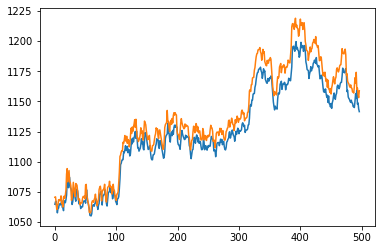

In [20]:
plt.plot(predicted_original)
plt.plot(actual['rate'])